# 1- Import Libariers and Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from matplotlib import rcParams    # to manipulate sizes of my figers
rcParams['figure.figsize'] = (12,8) 

In [3]:
df = pd.read_csv("realest.csv")
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


# 2. Data Review 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [5]:
df.shape

(157, 9)

In [6]:
df.nunique()

Price         47
Bedroom        7
Space        137
Room           7
Lot           11
Tax          138
Bathroom       5
Garage         4
Condition      2
dtype: int64

**Observations** :

* Dataset has 156 rows and 9 columns .

* all columns are float .

# 3- Data Cleaning and Exploring


### 3.1-Checking null values and duplicated rows

In [7]:
# columns which have nulls and the percentage of nulls in each column

data_na = (df.isnull().sum()/len(df)) 
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'mean of nulls' :data_na , "number_of_nulls" : df[data_na.index].isna().sum()})
missing_data

,mean of nulls,number_of_nulls
Space,0.070064,11
Lot,0.070064,11
Tax,0.063694,10
Price,0.006369,1
Bedroom,0.006369,1
Room,0.006369,1
Bathroom,0.006369,1
Garage,0.006369,1
Condition,0.006369,1


In [11]:
print(f'Number of missing data is {df.isna().sum().sum()}', end='\n\n')
print(f'Number of duplicated rows {df.duplicated().sum()}')

Number of missing data is 38

Number of duplicated rows 0


**Observations** :

* all columns have null values . all nulls is 38
* there are not duplicated rows

### Imputing Missing Values .

In [12]:
for col in df.columns:
    if col in ["Space","Tax","Lot"]:
        df[col]=df[col].fillna(df[col].mean())
    else :
        df[col]=df[col].fillna(df[col].median())

In [13]:
df.isna().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

### 3.2-Univariate analysis

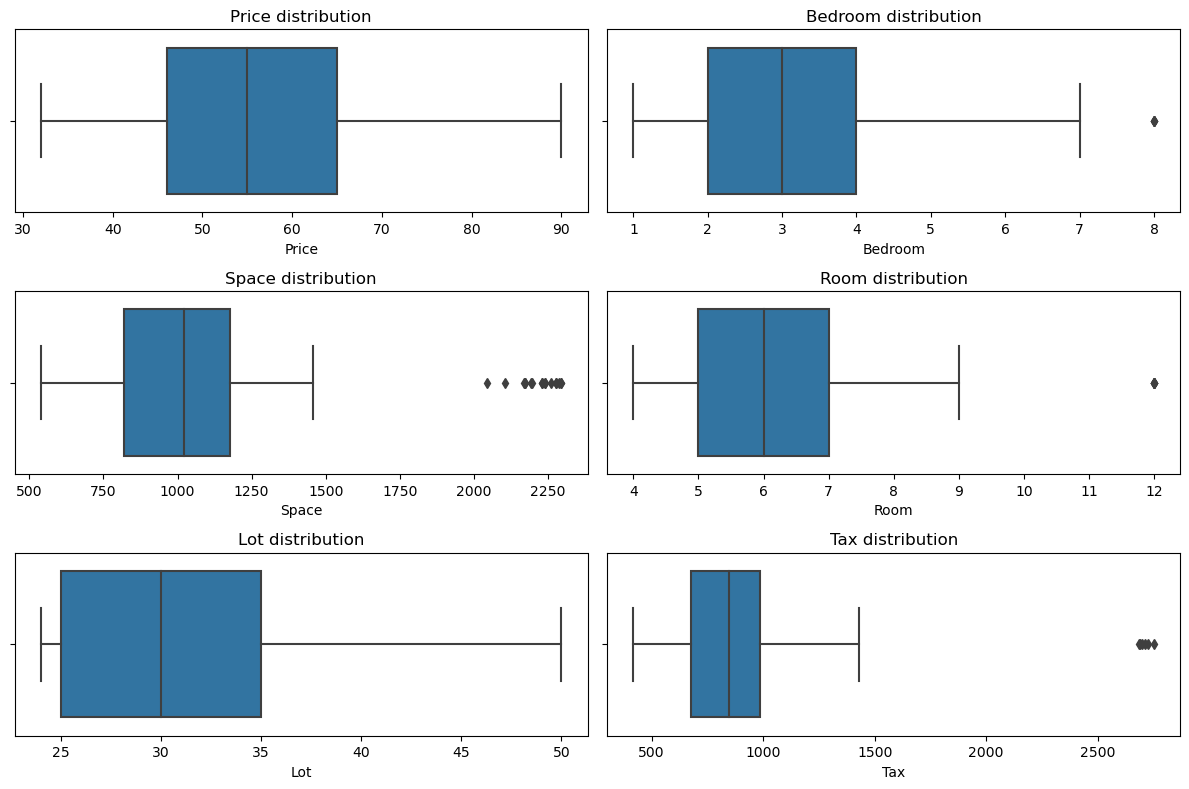

In [16]:
#boxplots
i=1
for col in df.drop(columns=["Condition","Garage","Bathroom"]).columns:
    plt.subplot(3,2,i)
    sns.boxplot(data=df, x=col)
    plt.title(col+" distribution")
    i=i+1
plt.tight_layout()
plt.show()

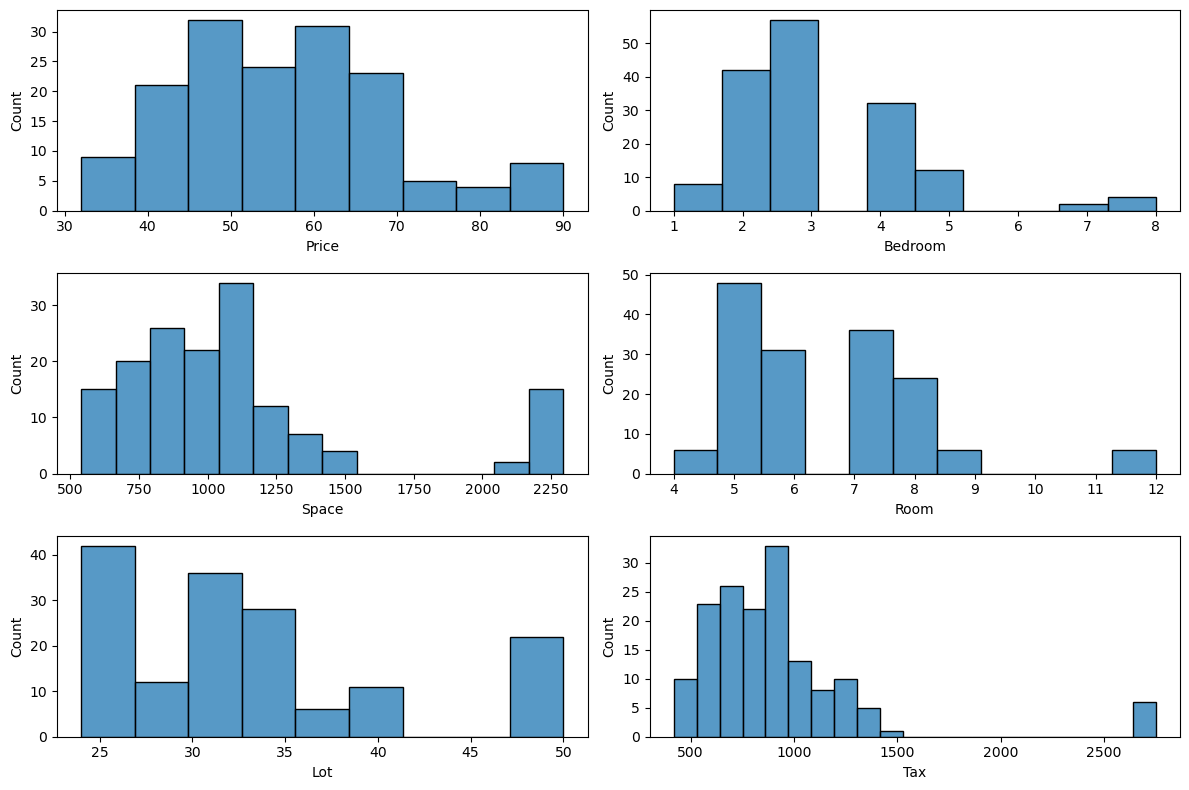

In [17]:
plt.figure()
i=1
for col in df.drop(columns=["Condition","Garage","Bathroom"]).columns :
    plt.subplot(3,2,i)
    sns.histplot(data=df,x=col)
    i=i+1
plt.tight_layout()
plt.show()

**Observations:**

* `price` column seems to be valid and there are no outliers.

* `Tax` and `Space` columns seem to be outliers but we don't handle with it becouse it Does't affect on the model.

### 3.4 Bivariate Analysis

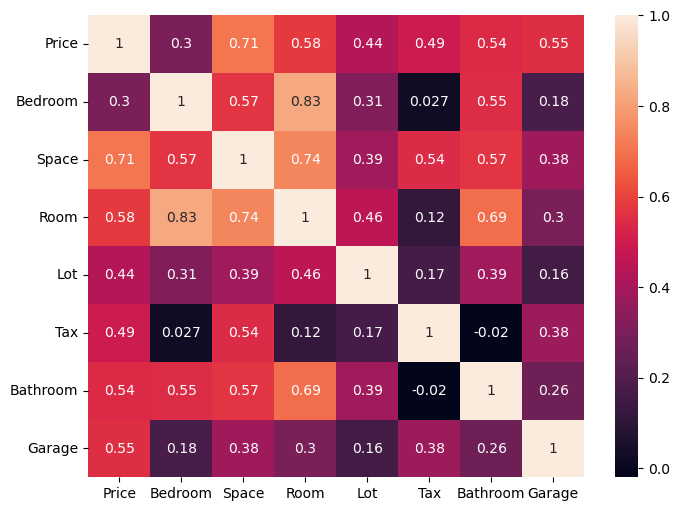

In [12]:
plt.figure(figsize=(8,6))
corr = df.drop(columns="Condition").corr()
sns.heatmap(corr ,annot=True);

As you see there is a strong relationship between `price` and `space` columns and intermediate relationships between `price` column and ather features.

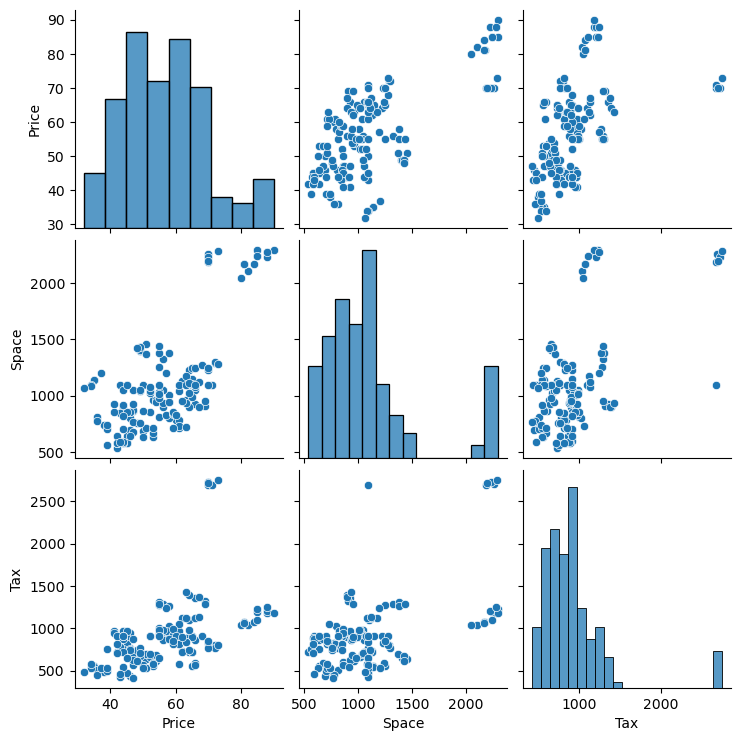

In [18]:
sns.pairplot(df[["Price","Space","Tax"]])
plt.show();

# 4- Build Model

### 4.1- Spliting the data

In [19]:
target="Price"
y=df[target]
X=df.drop(columns=[target,"Condition"])

In [20]:
X_train , X_test , y_train , y_test= train_test_split(X ,y, random_state=42 ,test_size=0.2)

In [21]:
print(f"shape of X_train {X_train.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of X_test {X_test.shape}")
print(f"shape of y_test {y_test.shape}")

shape of X_train (125, 7)
shape of y_train (125,)
shape of X_test (32, 7)
shape of y_test (32,)


### 4.3 Baseline

In [22]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 56.57
Baseline MAE: 10.34


#### 4.4 linear regression model

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [24]:
y_pred_training = model.predict(X_train)

print("Training MAE:", mean_absolute_error(y_pred_training, y_train))

Training MAE: 5.158892192533227


In [25]:
y_pred_testing = model.predict(X_test)

print("Training MAE:", mean_absolute_error(y_pred_testing, y_test))

Training MAE: 7.173497829885


## 5-Communicate Results

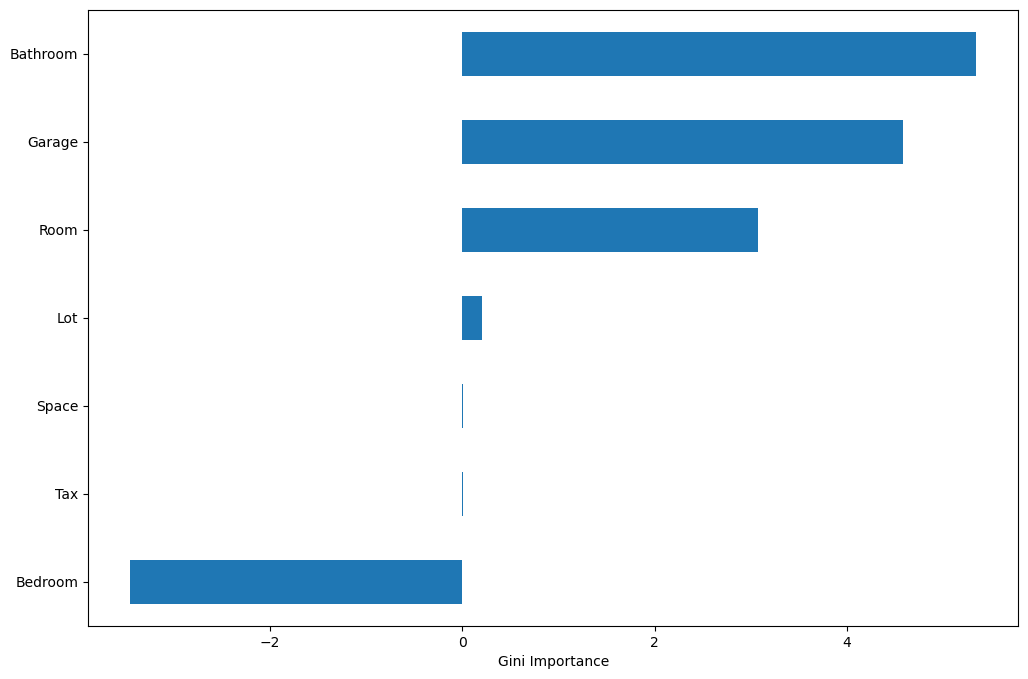

In [26]:
features = X_train.columns
importances = model.coef_

feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp[:5]
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance");

In [27]:
def make_prediction(Bedroom, Space, Room, Lot, Tax, Bathroom, Garage):
    
    data={
        'number of bedroom': Bedroom,
        'space': Space,
        'nimber of rooms ': Room,
        'lot': Lot,
        'annual tax': Tax,
        'nimber of bathrooms ': Bathroom,
        'Garage' : Garage
    }
    df=pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted price: ${prediction}"

In [28]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

interact(
    make_prediction, 
    Bedroom =Dropdown(options=sorted(X_train["Bedroom"].unique())),

    Space=IntSlider(
        min=X_train['Space'].min(),
        max=X_train['Space'].max(),
        value=X_train['Space'].mean(),
    ),
    Room=Dropdown(options=sorted(X_train["Room"].unique())),

    Lot=FloatSlider(
        min=X_train["Lot"].min(),
        max=X_train["Lot"].max(),
        value=X_train["Lot"].mean(),
    ),
    Tax=FloatSlider(
        min=X_train["Tax"].min(),
        max=X_train["Tax"].max(),
        value=X_train["Tax"].mean(),
    ),
    Bathroom=Dropdown(options=sorted(X_train["Bathroom"].unique())),
    Garage=Dropdown(options=sorted(X_train["Garage"].unique())),

);

interactive(children=(Dropdown(description='Bedroom', options=(1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0), value=1.0),…